<a href="https://colab.research.google.com/github/Yoon2596/kita_2404/blob/main/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EA%B3%BC%EC%A0%9C/%EA%B3%BC%EC%A0%9C_0729_%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1_0729. Target Column의 분포를 확인하고 다음 사항을 수행하세요.

- Target을 로그변환 및 X 변수들을 표준화한 후 모델 학습 및 평가
- 이상치 여부를 파악한 후 처리하고 모델 학습 및 평가
- 이상치 처리 전후에 대한 모델 평가 결과 비교 설명

데이터셋은 여러 개의 특성(피처)과 타겟 변수로 구성됩니다. 각 행은 하나의 지리적 블록 그룹(일종의 작은 행정 구역)에 해당하며, 각 특성은 해당 블록 그룹의 통계적 정보입니다.

- MedInc: Median Income in block group - 블록 그룹의 중간 소득 (단위:  $10,000).
- HouseAge: Median House Age in block group - 블록 그룹의 중간 주택 연령 (단위: 년).
- AveRooms: Average Number of Rooms per Household - 가구당 평균 방 개수.
- AveBedrms: Average Number of Bedrooms per Household - 가구당 평균 침실 개수.
- Population: Population in block group - 블록 그룹 내 인구 수.
- AveOccup: Average Number of Occupants per Household - 가구당 평균 거주자 수.
- Latitude: Latitude of block group - 블록 그룹의 위도.
- Longitude: Longitude of block group - 블록 그룹의 경도.

타겟 변수
- MedHouseVal: Median House Value in block group - 블록 그룹의 중간 주택 가치 (단위: 100,000달러).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# 캘리포니아 주택 데이터셋 불러오기
housing = fetch_california_housing()
housing.data.shape
X = housing.data
y = housing.target
# 데이터셋을 데이터프레임으로
df = pd.DataFrame(X, columns=housing.feature_names)
df['Target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


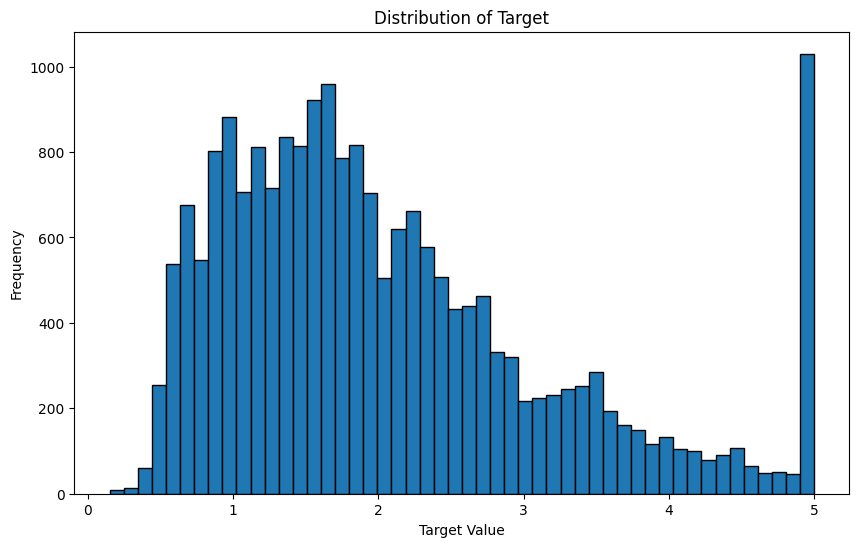

In [ ]:
# Target 분포 확인
plt.figure(figsize=(10, 6))
plt.hist(df['Target'], bins=50, edgecolor='k')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df.drop('Target', axis=1)
y = df['Target']

# 타겟 변수에 로그 변환 적용
y_log = np.log1p(y)
df['Log_Target'] = np.log1p(df['Target'])

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

# 모델 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 예측 및 평가
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"회귀 계수: {lin_reg.coef_}")
print(f"y 절편: {lin_reg.intercept_}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

회귀 계수: [ 0.24325329  0.02613095 -0.07440956  0.09706575  0.00370905 -0.01066411
 -0.34627426 -0.32934577]
y 절편: 1.0558830541469277
Mean Squared Error: 0.05
Mean Absolute Error: 0.17
Root Mean Squared Error: 0.22
R^2 Score: 0.60


In [ ]:
# 박스플로

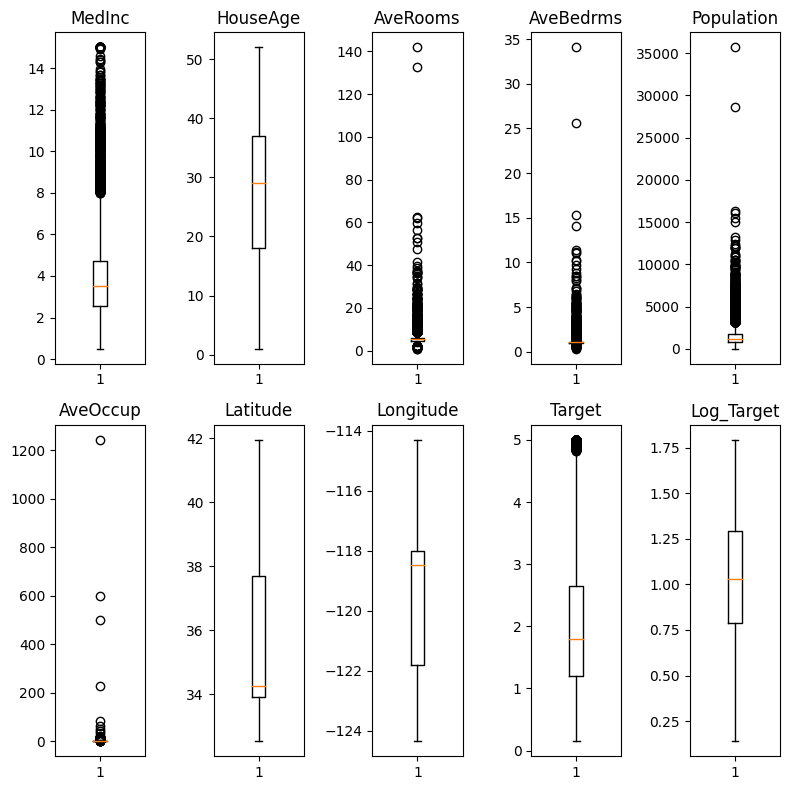

In [ ]:
# 박스플롯 그리기
plt.figure(figsize=(8, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 5, i)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
# IQR 방법을 사용한 이상치 처리 함수 정의
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 각 열에 대해 이상치 제거
for col in df.columns[:-2]:  # 'Target'과 'Log_Target' 제외
    df = remove_outliers(df, col)

y 데이터를 박스플롯으로 시각화 후 이상치 여부를 파악하고 이상치 제거 후 y분포와 y_log의 분포를 시각화

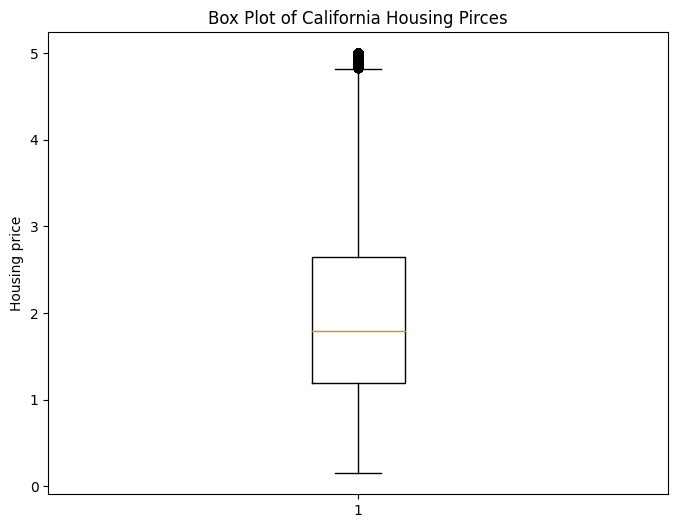

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# 캘리포니아 주택 데이터셋 불러오기
housing = fetch_california_housing()
housing.data.shape

# 박스플롯 그리기
plt.figure(figsize=(8, 6))
plt.boxplot(y)
plt.title('Box Plot of California Housing Pirces')
plt.ylabel('Housing price')
plt.show()

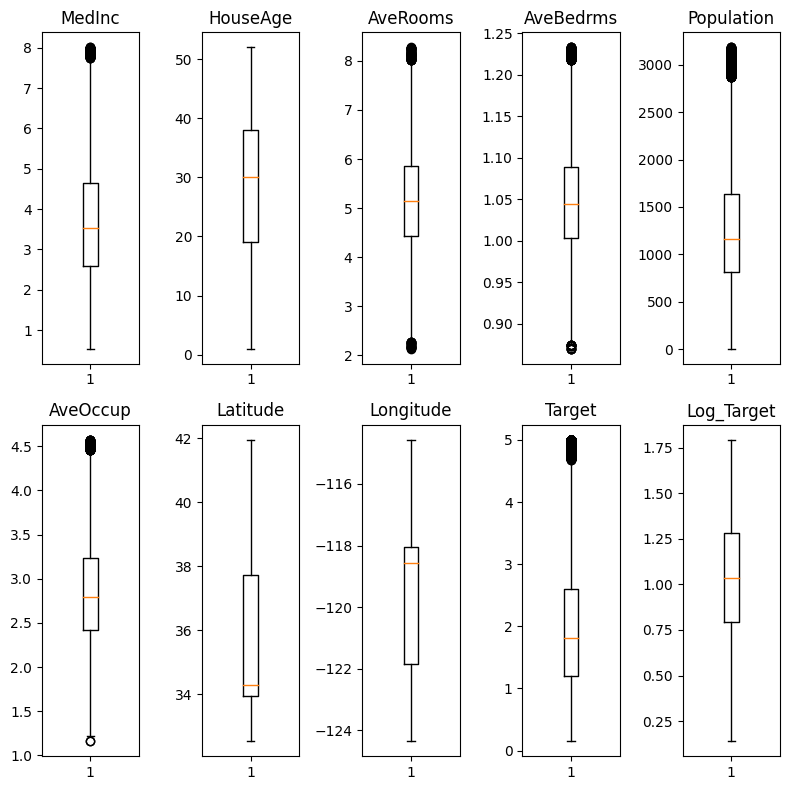

In [ ]:
# 박스플롯 그리기
plt.figure(figsize=(8, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 5, i)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=housing.feature_names)
df['Target'] = y  # Add the target variable to the DataFrame

# Calculate IQR for the target variable
Q1 = df['Target'].quantile(0.25)
Q3 = df['Target'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['Target'] < lower_bound) | (df['Target'] > upper_bound)]

# Output the observations corresponding to outliers
print(len(outliers))
outliers[:5]


1071


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001


In [ ]:
# outliers 제거
df_no_outliers = df[(df['Target'] >= lower_bound) & (df['Target'] <= upper_bound)]
print(df.info())
print(outliers.info())
print(df_no_outliers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1071 entries, 89 to 20443
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      1071 non-null   float64
 1   HouseAge    1071 non-null   float64
 2   AveRooms    1071 non-null   float64
 3   AveBedrms   1071 non-null   float64
 4   Population  1071 non-null   float64
 5   A

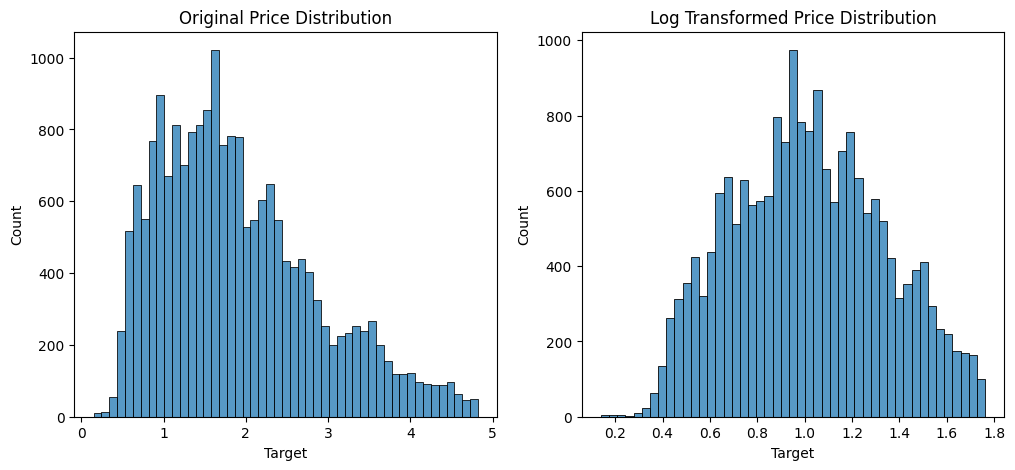

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1행 2열의 서브플롯 생성
fig, axs = plt.subplots(figsize=(12, 5), ncols=2, nrows=1)

# 원래 PRICE의 분포
sns.histplot(df_no_outliers['Target'], ax=axs[0])
axs[0].set_title('Original Price Distribution')

# 로그 변환된 PRICE의 분포
y_log = np.log1p(df_no_outliers['Target'])
sns.histplot(y_log, ax=axs[1])
axs[1].set_title('Log Transformed Price Distribution')

# 그래프 표시
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 캘리포니아 주택 데이터셋 불러오기

X = df_no_outliers.drop(['Target'], axis=1)
# X = df_no_outliers.drop(['Target','Latitude'], axis=1)
y = df_no_outliers['Target']

# 타겟 변수에 로그 변환 적용
y_log = np.log1p(y)

# 데이터셋을 DataFrame으로 변환
df = pd.DataFrame(X, columns=housing.feature_names)

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=0)

# 선형 회귀 모델 생성 및 훈련
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 및 성능 평가
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)  # Calculate R² score

print("회귀 계수:", lin_reg.coef_)
print("y 절편:", lin_reg.intercept_)
print("평균 제곱 오차(MSE):", round(mse,2))
print("Root Mean Square Error (RMSE):", round(rmse,2))
print("R² Score:", round(r2,2))

회귀 계수: [ 0.22215106  0.02632994 -0.08906435  0.11029448  0.0058401  -0.01191286
 -0.31453419 -0.29994792]
y 절편: 1.016939473521205
평균 제곱 오차(MSE): 0.04
Root Mean Square Error (RMSE): 0.21
R² Score: 0.59


In [ ]:
# 회귀 계수: [ 0.24325329  0.02613095 -0.07440956  0.09706575  0.00370905 -0.01066411
#  -0.34627426 -0.32934577]
# y 절편: 1.0558830541469277
# Mean Squared Error: 0.05
# Root Mean Squared Error: 0.22
# R^2 Score: 0.60

In [ ]:
# # 히트맵 그리기
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # 데이터프레임 생성
# df_list = [df, outliers, df_no_outliers]

# for i, d in enumerate(df_list):
#     plt.figure(figsize=(6, 5))
#     sns.heatmap(d.corr(), annot=True, cmap='coolwarm')
#     plt.title(f'Correlation Heatmap {i+1}')  # 제목에 인덱스 추가
#     plt.tight_layout()
#     plt.show()

#### 이상치 처리 여부 판단
평균 제곱 오차(MSE)가 향상(감소)되지만 이상값을 제거한 후 R-제곱 점수가 약간 나빠지는 것을 관찰하면 이는 회귀 모델에 대한 이상값의 미묘한 영향을 나타낸다.

최선의 조치를 해석하고 결정하는 방법

MSE 및 R-제곱 이해:

- MSE는 관찰된 실제 결과와 모델 예측 간의 평균 제곱 차이를 측정. MSE가 낮을수록 평균 오류가 더 작다는 것을 의미하므로 더 나은 적합성을 나타낸다.
- R-제곱은 독립 변수에서 예측 가능한 종속 변수의 분산 비율을 측정. 이는 실제 값에 대한 예측 세트의 적합도를 나타낸다. 그러나 R-제곱이 더 높다고 해서 반드시 모델이 더 좋다는 의미는 아니다.

이상치의 영향:
- 이상값을 제거하면 대부분의 데이터 포인트에 대해 모델이 더 정확해져서 MSE가 줄어들 수 있다. 그러나 이상치가 데이터의 특정 측면(이상치가 아님)을 나타내는 경우 이를 제거하면 모델의 일반화가 어려워져 R-제곱이 약간 낮아질 수 있다.

결정 기준:
- 모델 목적: 모델의 목적이 일반적인 사례를 정확하게 예측하는 것이고 이상값이 드물거나 예외적인 경우에는 낮은 MSE에 우선순위를 두는 것이 더 적절할 수 있다.
- 데이터 표현: 이상값이 실제 값이고 데이터의 중요한 변동을 나타내는 경우 더 높은 MSE에도 불구하고 모든 데이터에서 모델 예측 능력의 무결성을 유지하려면 이상값을 유지해야 할 수 있다.

도메인 지식:
- 도메인을 이해하면 이상값이 변칙인지 아니면 데이터의 필수 부분인지에 대한 통찰력을 얻을 수 있다. 예를 들어, 부동산에서는 가치가 매우 높은 부동산이 드물지만 여전히 고려해야 할 중요한 자산이다.
대체 접근 방식:

결론적으로 이상값을 제거하거나 유지하는 결정은 통계적 증거, 모델의 목적, 도메인 지식, 모델 사용에 대한 실제 고려 사항의 조합을 기반으로 해야 한다. 모든 경우에 적용되는 일률적인 답변은 없으며, 종종 가장 좋은 접근 방식은 여러 요소를 고려하고 도메인 전문가와 상담하는 것이다.

Task2_0729. alphas = [0, 0.1, 1, 10, 100]와 같이 주어졌을 때 다음을 수행하세요.
- alpha값에 따른 평균 RMSE
- alpha값에 따른 회귀계수의 변화

boston data
- CRIM: 도시별 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 주거 지역의 비율
- INDUS: 비소매상업지역 토지 비율
- CHAS: 찰스강에 대한 더미 변수 (강의 경계에 위치하면 1, 아니면 0)
- NOX: 산화질소 농도 (천만 분의 일)
- RM: 주택 1가구당 평균 방의 개수
- AGE: 1940년 이전에 건축된 소유주택의 비율
- DIS: 보스턴의 5개 고용 센터까지의 가중 거리
- RAD: 방사형 도로까지의 접근성 지수
- TAX: 10,000달러 당 재산세율
- PTRATIO: 도시별 학생-교사 비율
- B: 1000(Bk - 0.63)^2 여기서 Bk는 도시별 흑인의 비율을 의미
- LSTAT: 인구 중 하위 계층의 비율(%)
- MEDV: 본인 소유의 주택 가격(중앙값) (단위: $1000)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder

boston = fetch_openml(name="Boston", version=1, parser='auto')
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

# 카테고리 변수 처리
le = LabelEncoder()
boston_df['CHAS'] = le.fit_transform(boston_df['CHAS'])
boston_df['RAD'] = le.fit_transform(boston_df['RAD'])


# 특성과 타겟 분리
X_data = boston_df.drop('PRICE', axis=1)
y_target = boston_df['PRICE']

In [ ]:
print(X_data.shape, y_target.shape)

(506, 13) (506,)


In [ ]:
alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {}일 때 5 folds의 평균 RMSE : {:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE : 5.717
alpha 0.1일 때 5 folds의 평균 RMSE : 5.700
alpha 1일 때 5 folds의 평균 RMSE : 5.641
alpha 10일 때 5 folds의 평균 RMSE : 5.568
alpha 100일 때 5 folds의 평균 RMSE : 5.499


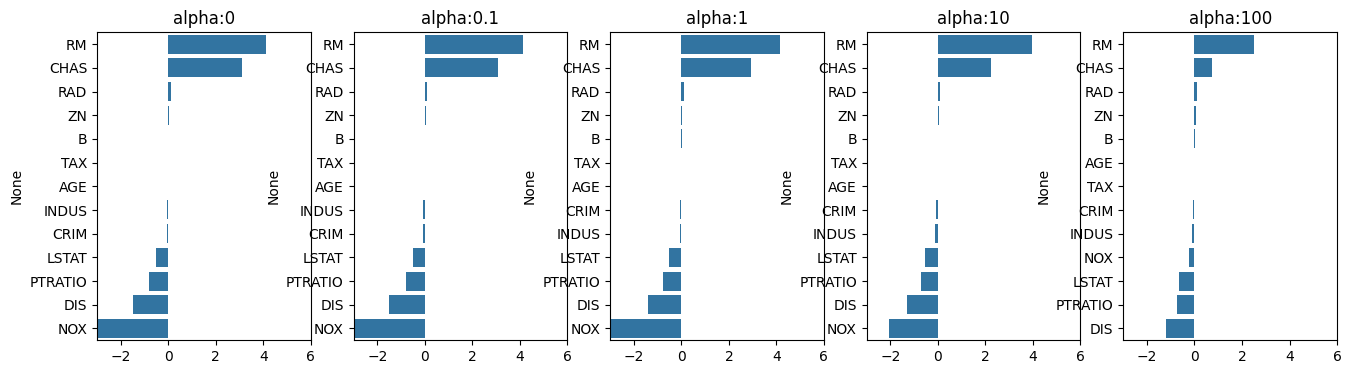

In [ ]:
# alpha 값이 증가하면서 회귀 계수가 지속적으로 작아짐
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16,4), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data,y_target)

    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

In [ ]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,4.113720,4.118217,4.133037,3.948086,2.506996
CHAS,3.083844,3.064099,2.926289,2.241946,0.743225
RAD,0.097228,0.096776,0.094484,0.094287,0.099261
ZN,0.042019,0.042188,0.043162,0.045368,0.049593
B,0.008355,0.008411,0.008710,0.009040,0.008208
TAX,0.001546,0.001373,0.000422,-0.000939,-0.001055
AGE,-0.004222,-0.005011,-0.009245,-0.013267,-0.000336
INDUS,-0.054296,-0.057680,-0.076297,-0.103658,-0.119831
CRIM,-0.065053,-0.064891,-0.063989,-0.062459,-0.058398
LSTAT,-0.515940,-0.517093,-0.524246,-0.550883,-0.658937


Q. 라쏘 회귀로 알파의 변화에 따른 RMSE와 회귀계수의 변화를 출력하세요(사용자 함수 적용)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder

boston = fetch_openml(name="Boston", version=1, parser='auto')
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

# 카테고리 변수 처리
le = LabelEncoder()
boston_df['CHAS'] = le.fit_transform(boston_df['CHAS'])
boston_df['RAD'] = le.fit_transform(boston_df['RAD'])

# 특성과 타겟 분리
X_data = boston_df.drop('PRICE', axis=1)
y_target = boston_df['PRICE']

In [ ]:
alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    neg_mse_scores = cross_val_score(ridge, X_data, y_target,\
                                    scoring="neg_mean_squared_error"\
                                    ,cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {}일 때 5 folds의 평균 RMSE : {:.3f}'.format(alpha,\
                                                         avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE : 5.717
alpha 0.1일 때 5 folds의 평균 RMSE : 5.700
alpha 1일 때 5 folds의 평균 RMSE : 5.641
alpha 10일 때 5 folds의 평균 RMSE : 5.568
alpha 100일 때 5 folds의 평균 RMSE : 5.499


In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
def get_linear_reg_eval(model_name,params=None,X_data_n=None, y_target_n=None, verbose=True):
  coeff_df = pd.DataFrame()
  if verbose : print('####### ', model_name , '#######')
  for param in params:
    if model_name == 'Ridge':model = Ridge(alpha=param)
    elif model_name == 'Lasso':model = Lasso(alpha=param)
    else : model = ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model,X_data_n,y_target_n, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print(f'alpha {param}일 때 5 폴드 세트의 평균 RMSE: {avg_rmse}')
    model.fit(X_data,y_target)
    coeff = pd.Series(data=model.coef_, index=X_data.columns)
    colname = 'alpha:'+str(param)
    coeff_df[colname] = coeff
  return coeff_df

In [ ]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)
coeff_lasso_df

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.63975318642497
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.639696014167153
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.721165611229234
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.910564972979698
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.225662896892307


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.060899,-0.060272,-0.047400,-0.027592,-0.000000
ZN,0.044466,0.044379,0.043056,0.043497,0.036646
INDUS,-0.100872,-0.096489,-0.065961,-0.035079,-0.000000
CHAS,1.814288,1.342789,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,4.041496,3.958515,2.765466,1.230766,0.000000
AGE,-0.014060,-0.012398,0.001813,0.018729,0.042256
DIS,-1.231606,-1.215476,-0.987331,-0.693531,-0.000000
RAD,0.073730,0.067353,0.000000,0.000000,0.000000
TAX,-0.001620,-0.001739,-0.002674,-0.003469,-0.005808


In [ ]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('ElasticNet', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)
coeff_lasso_df

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.5903593663528115
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.580020171066973
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.5950260435420205
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.773112322207657
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.137958613436409


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.060944,-0.060245,-0.049926,-0.035752,-0.000000
ZN,0.045591,0.045875,0.046041,0.045563,0.036390
INDUS,-0.105402,-0.103734,-0.090124,-0.063498,-0.000000
CHAS,1.619638,1.247154,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.817480,3.653256,2.103637,1.070492,0.000000
AGE,-0.012495,-0.010434,0.006584,0.019592,0.042696
DIS,-1.244686,-1.231931,-1.028697,-0.771315,-0.030723
RAD,0.081576,0.077310,0.000000,0.000000,0.000000
TAX,-0.001503,-0.001560,-0.002155,-0.002844,-0.005168


- 알파는 0 이상의 값으로 설정. 구체적인 범위는 특정한 제한이 있는 것은 아니며 적절한 값을 찾는 것은 모델의 성능과 데이터에 따라 다르다.
- 알파가 0일 경우 규제가 없는 것과 동일. 알파가 증가함에 따라 규제의 강도가 강해지고 모델의 가중치에 대한 제약이 커진다. 이는 과적합을 방지하지만 너무 큰 알파 값은 과소적합을 야기할 수 있다.